<div style="text-align: center"><H1> PROBLEMA DE DIRICHLET </H1></div>
<div style="text-align: center"><H4> Flores Carmona Jorge Emilio | Ecs.Dif. Parciales I | EJERCICIO 1 </H4></div>

Intrucciones: Resuelva los ejercicios de la manera más detallada, completa y clara posible.
Entregue este ejercicio.

1. Para resolver la ecuación de Laplace:

$$\frac{∂^2u}{∂x^2}+\frac{∂^2u}{∂y^2}=0,    0<x<1,    0<y<1$$
Para las condiciones de frontera:

a) $u(0,y)=u(1,y)=0; u(x,0)=100; u(x,1)=200$

Graficamos las condiciones de frontera

In [15]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import math

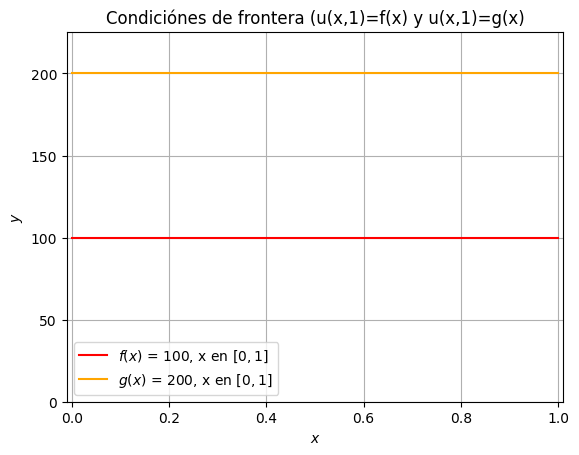

In [2]:
x = np.linspace(0,1,200)
x1 = np.linspace(0, 1,200)
x2 = np.linspace(0, 1,200)
plot(x1, [100 for x in x1], 'red',label='$f(x)$ = 100, x en $[0, 1]$')
plot(x2, [200 for x in x2], 'orange',label='$g(x)$ = 200, x en $[0, 1]$')
plt.xlabel('$x$'); plt.ylabel('$y$');
plt.title("Condiciónes de frontera (u(x,1)=f(x) y u(x,1)=g(x)"),xlim([-0.01,1.01]),ylim([0.0,225.2]),grid(),legend()
show()

Se propone una solucion 
$$u(x,y)=X(x)Y(y)$$
Donde 

$X_n(x)=C_6 sin(n\pi x)$

$Y_n(y)=C_7 cosh(n \pi y ) + C_8 senh(n \pi y)$


Usamos series de Fourier para aproximar la primer condicion de frontera
$u(x,0)=100$

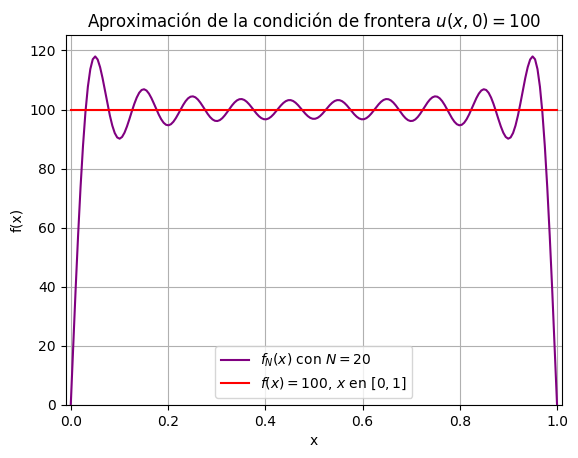

In [3]:
def u_0(x,N=20): 
    f = zeros(len(x))
    for n in range(1,N):
        f += ((1-(-1)**n)/n)*sin(n*pi*x)
    return (200.0/pi)*f
f_n = u_0(x)
plot(x,f_n,'purple',label='$f_N(x)$ con $N=20$')
x1 = np.linspace(0, 1,200)
plot(x1, [100 for x in x1], 'red',label='$f(x)= 100$, $x$ en $[0,1]$')
plt.ylabel('f(x)'); 
plt.xlabel('x'); 
plt.title("Aproximación de la condición de frontera $u(x,0)=100$")
xlim([-0.01,1.01]),ylim([0.0,125.2]),grid(),legend()
show()

Ahora graficamos la segunda condicion de frontera
$u(x,1)=200$

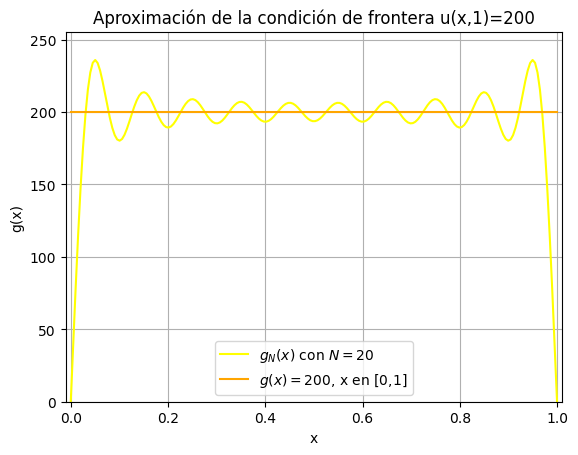

In [4]:
def u_1(x,N=20): 
    f = zeros(len(x))
    for n in range(1,N):
        f += ((1-(-1)**n)/n)*sin(n*pi*x)
    return (400.0/pi)*f
g_n = u_1(x)
plot(x,g_n, 'yellow', label='$g_N (x)$ con $N=20$')
x1 = np.linspace(0, 1,200)
plot(x1, [200 for x in x1], 'orange',label='$g(x) = 200$, x en [0,1]')
plt.ylabel('g(x)')
plt.xlabel('x') 
plt.title("Aproximación de la condición de frontera u(x,1)=200")
xlim([-0.01,1.01]),ylim([0.0,255.2]),grid(),legend()
show()

Graficamos la solucion completa con 20 armonicos y $y=0$
$$u(x,y)=\sum_{n=1}^{\infty}200 \left(\frac{1-(-1)^n}{n\pi}\right)\left(cosh(n\pi y)+\frac{2-cosh(n\pi)}{sinh(n\pi)}sinh(n\pi y) \right)sin (n\pi x)$$

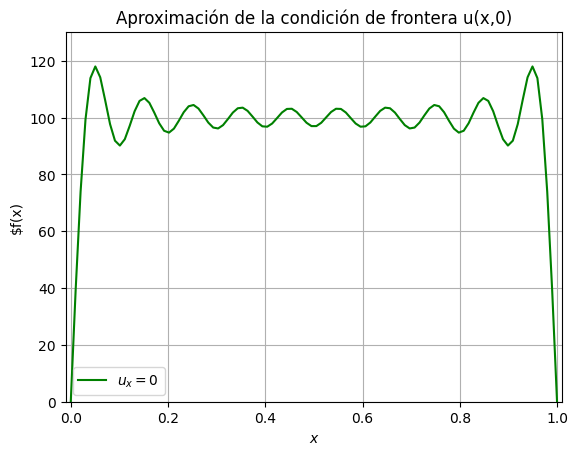

In [13]:
def u_x_y(x,y,N=20):
    f = zeros( (len(x),len(y)) )
    for i in range(len(y)):
        for n in range(1,N):
            f[:,i] += (((1-(-1)**n)*cosh(n*pi*y[i])/n)+((1-(-1)**n)*(2-cosh(n*pi))/(n*sinh(n*pi)))*sinh(n*pi*y[i]))*sin(n*pi*x)
    return (200.0/pi)*f
x = linspace(0,1,100)
y = linspace(0,1,100)
U = u_x_y(x,y)
plot(x,U[:,0],'green', label='$u_x=0$')
plt.xlabel('$x$')
plt.ylabel('$f(x)') 
plt.title("Aproximación de la condición de frontera u(x,0)")
xlim([-0.01,1.01]),ylim([0.0,130.05]),grid(),legend()
show()

Ahora variamos $y$ para observar como varia la solucion respecto al cambio en un intervalo $[0,1]$

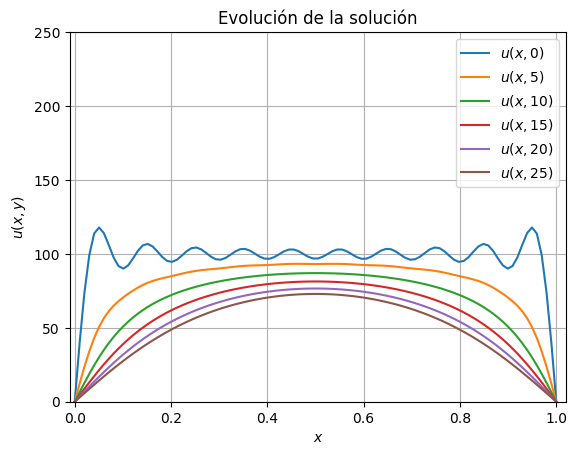

In [6]:
plot(x,U[:,0],label='$u(x,0)$')
plot(x,U[:,5],label='$u(x,5)$')
plot(x,U[:,10],label='$u(x,10)$')
plot(x,U[:,15],label='$u(x,15)$')
plot(x,U[:,20],label='$u(x,20)$')
plot(x,U[:,25],label='$u(x,25)$')
plt.xlabel('$x$')
plt.ylabel('$u(x,y)$')
plt.title("Evolución de la solución")
xlim([-0.01,1.02]),ylim([0.0,250.25]),grid(),legend()
show()

Veamos la solucion en una grafica 3D

In [17]:
from mpl_toolkits.mplot3d import Axes3D

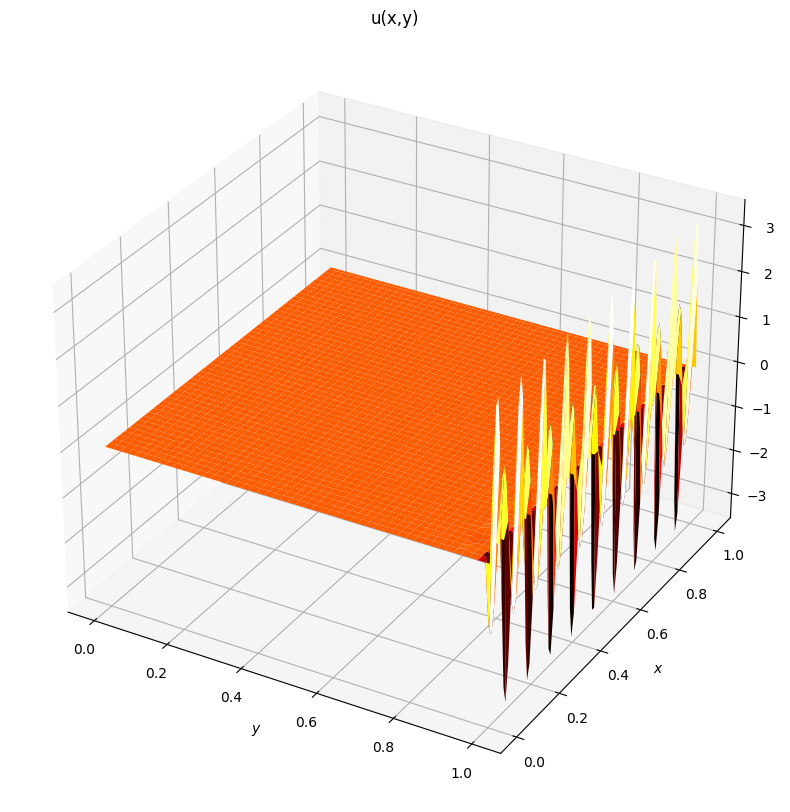

In [24]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
y = linspace(0,1.0,100)

X,Y = np.meshgrid(x,y)

U=u_x_y(x,y)

plt.xlabel('$y$')
plt.ylabel('$x$')
plt.title("u(x,y)")
ax.plot_surface(X, Y, U, cmap="hot");